In [1]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras import layers, models
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.preprocessing import image
from sklearn.model_selection import StratifiedKFold
from tensorflow.keras.optimizers import Adam


In [2]:
# Cargar el dataset MNIST
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

# Normalizar las imágenes para que estén en el rango [0, 1]
x_train, x_test = x_train / 255.0, x_test / 255.0

# Redimensionar las imágenes a 28x28x1
x_train = np.expand_dims(x_train, -1)
x_test = np.expand_dims(x_test, -1)

# Convertir las etiquetas a formato one-hot
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)


# Crear un generador de datos para el aumento de datos
datagen = ImageDataGenerator(
    rotation_range=5,  # Reducir la rotación
    zoom_range=0.05,   # Reducir el zoom
    width_shift_range=0.05,  # Reducir el desplazamiento
    height_shift_range=0.05, 
    shear_range=0.05, 
    horizontal_flip=False  # No es necesario voltear imágenes de dígitos
)

# Ajustar el generador de datos para que procese las imágenes de entrenamiento
datagen.fit(x_train)


# Verificación de la forma de los datos
print(f'Tamaño de x_train: {x_train.shape}, tamaño de y_train: {y_train.shape}')

Tamaño de x_train: (60000, 28, 28, 1), tamaño de y_train: (60000, 10)


In [3]:
# Definir el modelo CNN

model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    layers.BatchNormalization(),
    layers.MaxPooling2D((2, 2)),
    
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.BatchNormalization(),
    layers.MaxPooling2D((2, 2)),
    
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(10, activation='softmax')
])



# Compilación del modelo
model.compile(optimizer=Adam(learning_rate=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])

# Crear un modelo


# Resumen de la arquitectura del modelo
model.summary()


c:\Users\jcv19\OneDrive\Documentos\VISUALSTUDIO\.conda\lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 26, 26, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 11, 11, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 11, 11, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 1600)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │       204,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 225,418 (880.54 KB)

 Trainable params: 225,226 (879.79 KB)

 Non-trainable params: 192 (768.00 B)

In [4]:
# Definir el Early Stopping para evitar el sobreajuste
early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

# Entrenar el modelo utilizando el generador de datos con aumento de datos
history = model.fit(
    
  # datagen.flow(x_train, y_train, batch_size=32),

    x_train, y_train,  
    batch_size=32,

    epochs=10,
    validation_data=(x_test, y_test),
    callbacks=[early_stopping] 
)

# Evaluar el modelo en el conjunto de prueba
test_loss, test_acc = model.evaluate(x_test, y_test, verbose=2)
print(f'Test accuracy: {test_acc}')


Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 17s 9ms/step - accuracy: 0.7526 - loss: 0.8435 - val_accuracy: 0.9779 - val_loss: 0.0744
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 16s 9ms/step - accuracy: 0.9614 - loss: 0.1313 - val_accuracy: 0.9838 - val_loss: 0.0480
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 17s 9ms/step - accuracy: 0.9745 - loss: 0.0859 - val_accuracy: 0.9869 - val_loss: 0.0400
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 17s 9ms/step - accuracy: 0.9802 - loss: 0.0669 - val_accuracy: 0.9874 - val_loss: 0.0361
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 17s 9ms/step - accuracy: 0.9837 - loss: 0.0522 - val_accuracy: 0.9900 - val_loss: 0.0318
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 17s 9ms/step - accuracy: 0.9862 - loss: 0.0449 - val_accuracy: 0.9921 - val_loss: 0.0254
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 17s 9ms/step - accuracy: 0.9889 - loss: 0.0379 - val_accuracy: 0.9915 - val_loss: 0.0268
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 17s 9ms/step - accuracy: 0.9901 - loss: 0

In [ ]:

# Crear un objeto StratifiedKFold para validación cruzada
kf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Listas para almacenar los resultados de cada fold
accuracies = []

# Validación cruzada
for fold, (train_idx, val_idx) in enumerate(kf.split(x_train, np.argmax(y_train, axis=1))):
    print(f'\nEntrenando para el fold {fold + 1}/{kf.get_n_splits()}...')

    # Dividir los datos en conjunto de entrenamiento y validación para este fold
    x_train_fold, x_val_fold = x_train[train_idx], x_train[val_idx]
    y_train_fold, y_val_fold = y_train[train_idx], y_train[val_idx]


    # Definir el EarlyStopping para evitar el sobreajuste
    early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

    # Entrenar el modelo
    history = model.fit(

        datagen.flow(x_train_fold, y_train_fold, batch_size=32),

#        x_train, y_train,  
#        batch_size=32,

        epochs=10,
        validation_data=(x_val_fold, y_val_fold),
        callbacks=[early_stopping]
        )

    # Evaluar el modelo en el conjunto de validación
    val_loss, val_acc = model.evaluate(x_val_fold, y_val_fold, verbose=0)
    print(f'Precisión en el fold {fold + 1}: {val_acc:.4f}')
        
    # Almacenar la precisión para este fold
    accuracies.append(val_acc)

# Promediar la precisión a través de todos los folds
mean_accuracy = np.mean(accuracies)
print(f'\nPrecisión promedio en validación cruzada: {mean_accuracy:.4f}')


Entrenando para el fold 1/5...
Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 17s 9ms/step - accuracy: 0.9925 - loss: 0.0253 - val_accuracy: 0.9954 - val_loss: 0.0123
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 17s 9ms/step - accuracy: 0.9936 - loss: 0.0212 - val_accuracy: 0.9975 - val_loss: 0.0088
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 17s 9ms/step - accuracy: 0.9945 - loss: 0.0186 - val_accuracy: 0.9983 - val_loss: 0.0071
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 17s 9ms/step - accuracy: 0.9949 - loss: 0.0165 - val_accuracy: 0.9983 - val_loss: 0.0071
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 17s 9ms/step - accuracy: 0.9950 - loss: 0.0153 - val_accuracy: 0.9980 - val_loss: 0.0074
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 17s 9ms/step - accuracy: 0.9955 - loss: 0.0148 - val_accuracy: 0.9991 - val_loss: 0.0044
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 17s 9ms/step - accuracy: 0.9966 - loss: 0.0115 - val_accuracy: 0.9992 - val_loss: 0.0035
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 17s 9ms/s

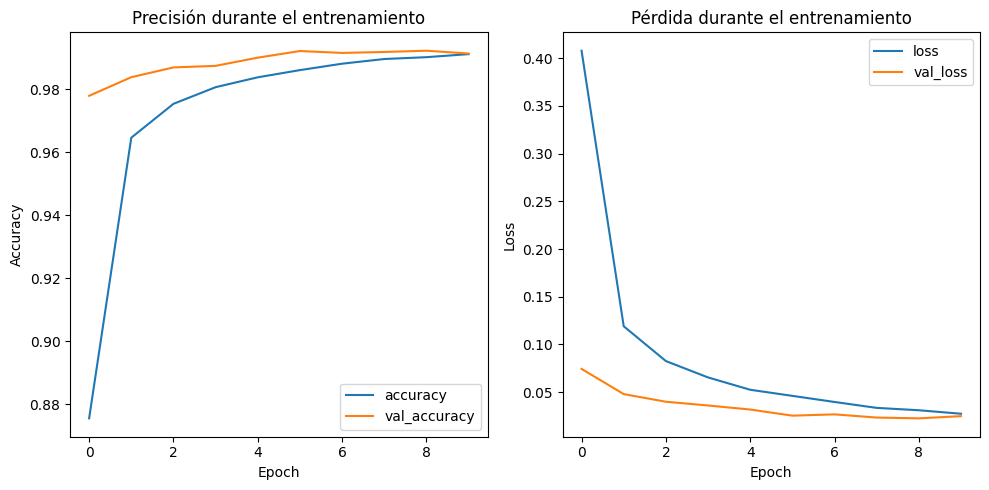

In [5]:
# Visualización de las métricas de entrenamiento
plt.figure(figsize=(10, 5))

# Graficar la precisión durante el entrenamiento
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.title('Precisión durante el entrenamiento')

# Graficar la pérdida durante el entrenamiento
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(loc='upper right')
plt.title('Pérdida durante el entrenamiento')

plt.tight_layout()
plt.show()


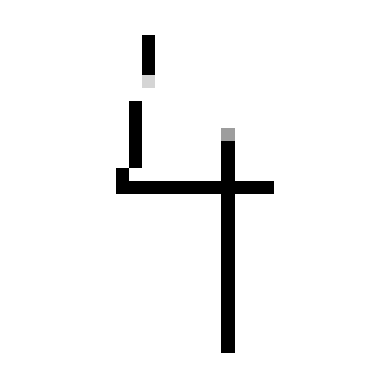

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
Probabilidades para cada clase (dígitos 0-9):
Clase 0: 0.0000
Clase 1: 0.0000
Clase 2: 0.0000
Clase 3: 0.0000
Clase 4: 0.9984
Clase 5: 0.0000
Clase 6: 0.0001
Clase 7: 0.0003
Clase 8: 0.0011
Clase 9: 0.0001
El número predicho es: 4


In [27]:
# Función para cargar una imagen y preprocesarla
# Función para cargar la imagen, invertir colores y preprocesarla
def cargar_imagen(imagen_path):
    # Cargar la imagen desde la ruta y redimensionarla a 28x28 píxeles (como las imágenes del dataset MNIST)
    img = image.load_img(imagen_path, color_mode="grayscale", target_size=(28, 28))
    
    # Convertir la imagen a una matriz de numpy
    img_array = image.img_to_array(img)
    
    # Invertir los colores (convertir fondo blanco a negro y trazo negro a blanco)
    img_array = 255 - img_array  # Resta los valores de los píxeles de 255 para invertir los colores
    
    # Normalizar los valores de los píxeles a [0, 1]
    img_array = img_array / 255.0
    
    # Redimensionar para que tenga la forma (1, 28, 28, 1)
    img_array = np.expand_dims(img_array, axis=0)
    
    return img_array, img  # Devuelve también la imagen original para mostrarla


# Función para predecir el número de una imagen
def predecir_numero(imagen_path):
    img_array, img = cargar_imagen(imagen_path)
    
    # Mostrar la imagen
    plt.imshow(img, cmap='gray')
    plt.axis('off')  # No mostrar los ejes
    plt.show()
    
    # Realizar la predicción
    prediccion = model.predict(img_array)
    
    # Mostrar todas las probabilidades para cada clase (dígitos 0-9)
    print("Probabilidades para cada clase (dígitos 0-9):")
    for i, prob in enumerate(prediccion[0]):
        print(f"Clase {i}: {prob:.4f}")
    
    # Encontrar la clase con la mayor probabilidad
    numero_predicho = np.argmax(prediccion)
    
    return numero_predicho, prediccion[0]  # Devolver el número predicho y todas las probabilidades

# Usar la función para predecir una imagen
imagen_path = 'imagen.png'  # Cambia esta ruta a tu imagen .png
numero, probabilidades = predecir_numero(imagen_path)
print(f'El número predicho es: {numero}')


In [12]:
model.save('cnn_model.keras')